### Problem Statement Scenario:
##### A fare calculator helps a customer in identifying the fare valid for the trip. They are often used by passengers who are new to a city or tourists to get an estimate of the travel costs. You are provided with a dataset with features like fare amount, pickup and drop location, passenger count, and so on.

### Load data
##### As the train data is huge volume, we just load 200,000 rows in our demo analysis in order to save time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train_taxi.csv', nrows = 200000)
test = pd.read_csv('test_taxi.csv')
train.shape, test.shape

((200000, 8), (9914, 7))

In [3]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


##### we can see the minimum value of fare amount is negative which is not the valid value, so we need to remove the fare which are negative values.

In [5]:
train.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

##### There are two missing values in dropoff_longitude and dropoff_latitude, we can remove them as removing 2 missing values from our huge dataset won't affect our analysis result.

In [6]:
train.dropna(inplace = True)

### Exploratory Data Analysis

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                199999 non-null  object 
 1   fare_amount        199999 non-null  float64
 2   pickup_datetime    199999 non-null  object 
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


##### There are 8 features in our dataset with 2 object columns. Let's convert pickup_datetime column from object to date time.

In [8]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

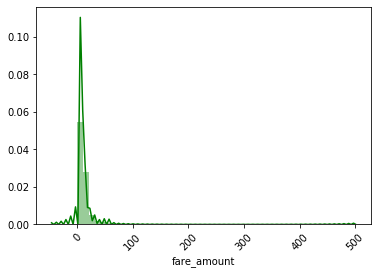

In [9]:
sns.distplot(train['fare_amount'], kde = True, color = 'green')
plt.xticks(rotation = 45)
plt.show()

##### In histogram plot, we can also see that some values are negative which are invalid values.

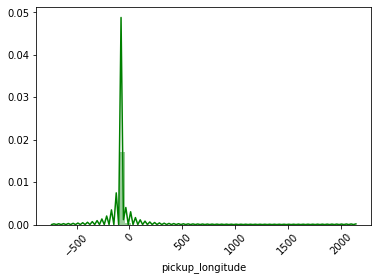

In [10]:
sns.distplot(train['pickup_longitude'], kde = True, color = 'green')
plt.xticks(rotation = 45)
plt.show()

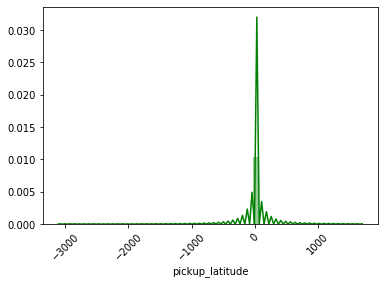

In [11]:
sns.distplot(train['pickup_latitude'], kde = True, color = 'green')
plt.xticks(rotation = 45)
plt.show()

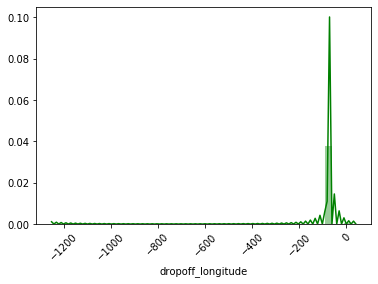

In [12]:
sns.distplot(train['dropoff_longitude'], kde = True, color = 'green')
plt.xticks(rotation = 45)
plt.show()

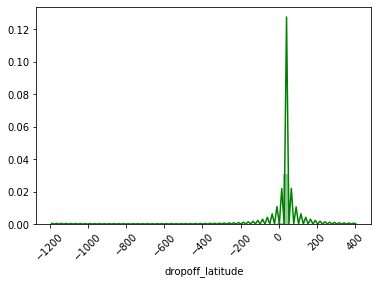

In [13]:
sns.distplot(train['dropoff_latitude'], kde = True, color = 'green')
plt.xticks(rotation = 45)
plt.show()

##### Here we can see minimum value and maximum value of latitude and longitude beyond the reasonable range, we probably need to remove these data points.

### Feature Engineering

In [14]:
print("drop_off latitude min value",test["dropoff_latitude"].min())
print("drop_off latitude max value",test["dropoff_latitude"].max())
print("drop_off longitude min value", test["dropoff_longitude"].min())
print("drop_off longitude max value",test["dropoff_longitude"].max())
print("pickup latitude min value",test["pickup_latitude"].min())
print("pickup latitude max value",test["pickup_latitude"].max())
print("pickup longitude min value",test["pickup_longitude"].min())
print("pickup longitude max value",test["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


In [15]:
min_latitude = 40.568973
max_latitude = 41.709555
min_longitude = -74.263242
max_longitude = -72.986532

In [16]:
train_temp=train[(train["dropoff_latitude"]<min_latitude) | (train["pickup_latitude"]<min_latitude) | (train["dropoff_longitude"]<min_longitude) | (train["pickup_longitude"]<min_longitude) | (train["dropoff_latitude"]>max_latitude) | (train["pickup_latitude"]>max_latitude) | (train["dropoff_longitude"]>max_longitude) | (train["pickup_longitude"]>max_longitude) ]
print("before droping",train.shape)
train.drop(train_temp.index,inplace=True)
print("after droping",train.shape)

before droping (199999, 8)
after droping (195774, 8)


In [17]:
print("before droping", train.shape)
train=train[train['fare_amount']>0]
print("after droping", train.shape)

before droping (195774, 8)
after droping (195758, 8)


In [18]:
import calendar
#print(list(calendar.day_name))
#print(calendar.day_name[2])

In [19]:
train['day'] = train['pickup_datetime'].apply(lambda x:x.day)
train['hour'] = train['pickup_datetime'].apply(lambda x:x.hour)
train['month'] = train['pickup_datetime'].apply(lambda x:x.month)
train['year'] = train['pickup_datetime'].apply(lambda x:x.year)
train['weekday'] = train['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])

In [20]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,6,2009,Monday
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,1,2010,Tuesday
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,8,2011,Thursday
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,2012,Saturday
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,3,2010,Tuesday


In [21]:
train['weekday'] = train['weekday'].map({'Sunday':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6})


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195758 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                195758 non-null  object             
 1   fare_amount        195758 non-null  float64            
 2   pickup_datetime    195758 non-null  datetime64[ns, UTC]
 3   pickup_longitude   195758 non-null  float64            
 4   pickup_latitude    195758 non-null  float64            
 5   dropoff_longitude  195758 non-null  float64            
 6   dropoff_latitude   195758 non-null  float64            
 7   passenger_count    195758 non-null  int64              
 8   day                195758 non-null  int64              
 9   hour               195758 non-null  int64              
 10  month              195758 non-null  int64              
 11  year               195758 non-null  int64              
 12  weekday            195758 non-

In [23]:
train = train[train['passenger_count'] <= 7]

In [24]:
# key column and pickup_datetime column are not needed for model, let's drop off these columns.
train.drop(['key', 'pickup_datetime'], axis = 1, inplace = True)

In [25]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,6,2009,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,1,2010,2
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,8,2011,4
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,2012,6
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,3,2010,2


### Build model 
##### As we have to build regression model, we can start with linear regression.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = train.drop('fare_amount', axis = 1)
y = train[['fare_amount']]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((137030, 10), (58728, 10), (137030, 1), (58728, 1))

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [32]:
predicted_fare = lr_model.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
lr_model_rmse = np.sqrt(mean_squared_error(predicted_fare, y_test))
print('RMSE of linear regression is', lr_model_rmse)

RMSE of linear regression is 8.33869227150643


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
gbr_model = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, random_state = 2)

In [37]:
gbr_model.fit(x_train, y_train)

C:\Users\bnmwe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(random_state=2)

In [38]:
predicted_fare_gbr = gbr_model.predict(x_test)

In [39]:
gbr_model_rmse = np.sqrt(mean_squared_error(predicted_fare_gbr, y_test))
print('RMSE of Gradient Boosting regression is', gbr_model_rmse)

RMSE of Gradient Boosting regression is 5.11017268564031


### Conclusion
##### Compare RMSE of Gradient Boosting regression with RMSE of linear regression, the Gradient Boosting Regression mode is giving a better result, so we can use it as the final model.